In [1]:
import yfinance as yf

In [2]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [ ]:
import yfinance as yf

In [ ]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [ ]:
stock = "GOOG"
google_data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
google_data.shape

(5032, 6)

In [ ]:
google_data.describe()

Open         High          Low        Close    Adj Close  \
count  5032.000000  5032.000000  5032.000000  5032.000000  5032.000000   
mean     49.586913    50.112145    49.093188    49.610433    49.445911   
std      47.532861    48.065708    47.068842    47.569851    47.435752   
min       4.366135     4.443345     4.298140     4.358414     4.342810   
25%      13.450148    13.573809    13.312788    13.434830    13.386730   
50%      28.478506    28.697694    28.177509    28.425083    28.323314   
75%      66.445127    67.092749    65.831123    66.490751    66.252703   
max     204.500000   208.699997   204.259995   207.710007   207.710007   

             Volume  
count  5.032000e+03  
mean   1.068756e+08  
std    1.393336e+08  
min    1.584340e+05  
25%    2.637800e+07  
50%    4.960960e+07  
75%    1.306178e+08  
max    1.650833e+09

In [ ]:
google_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of Google data')

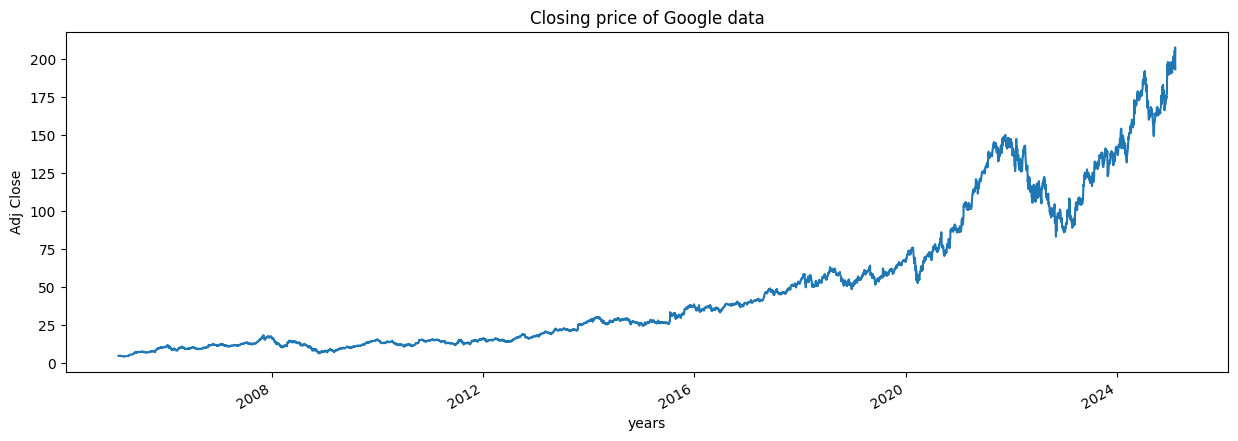

In [ ]:
plt.figure(figsize = (15,5))
google_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing price of Google data")

In [ ]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")


In [ ]:
google_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

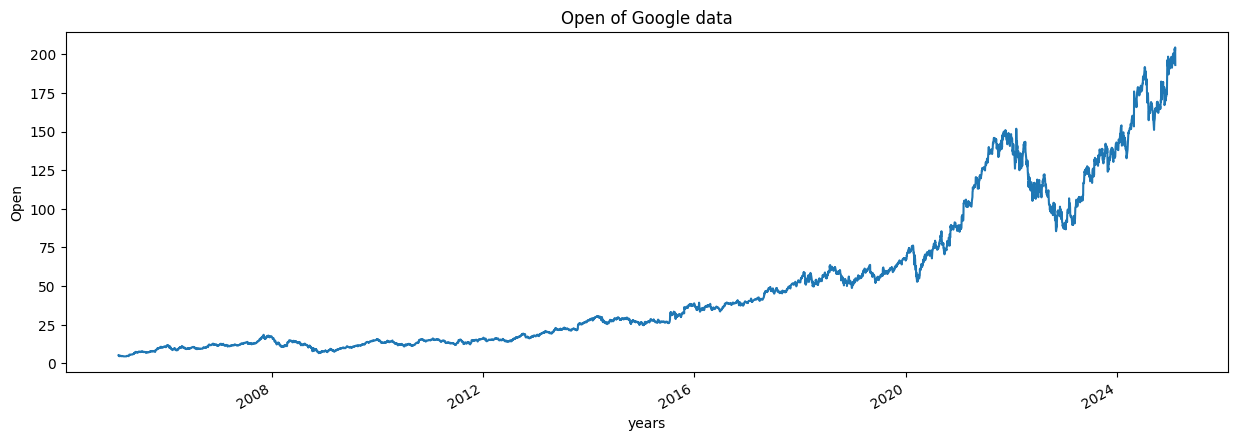

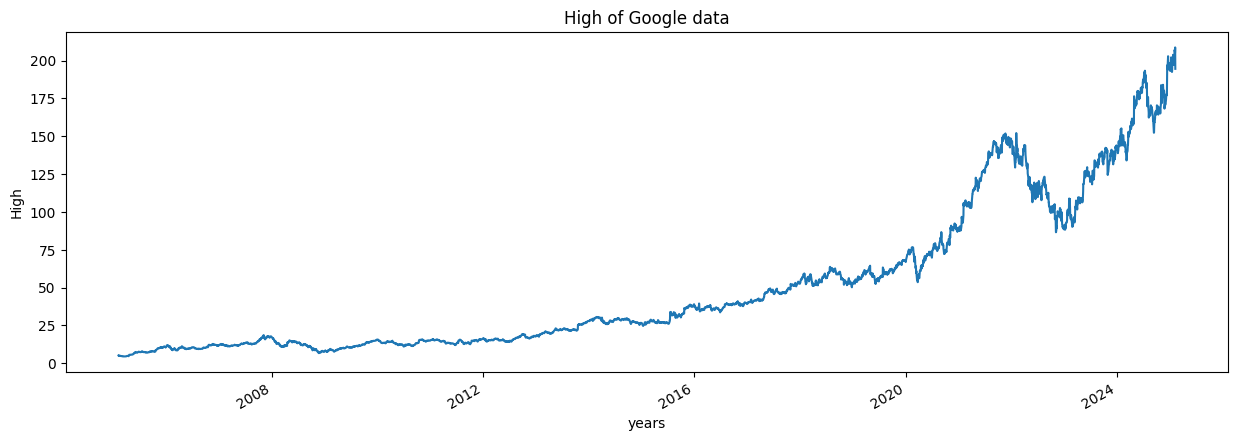

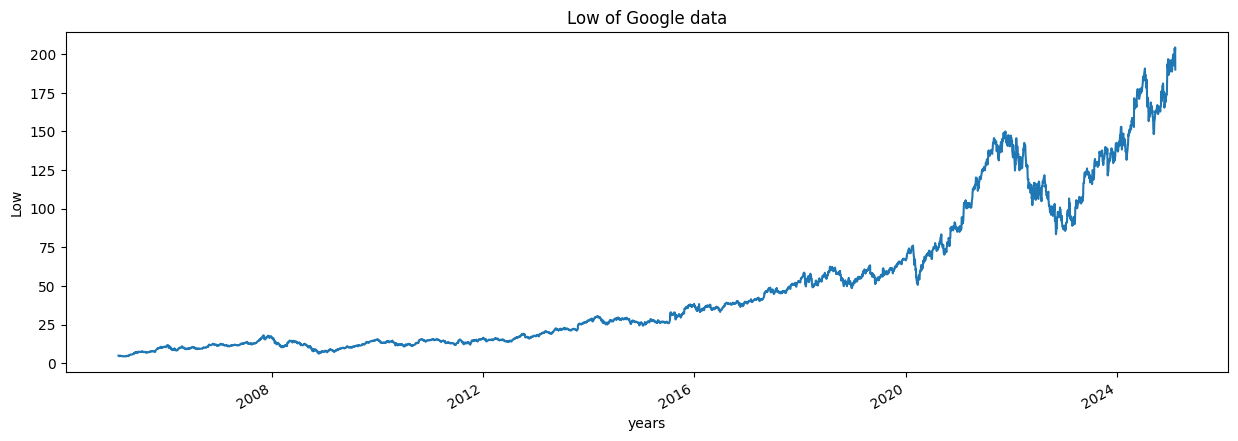

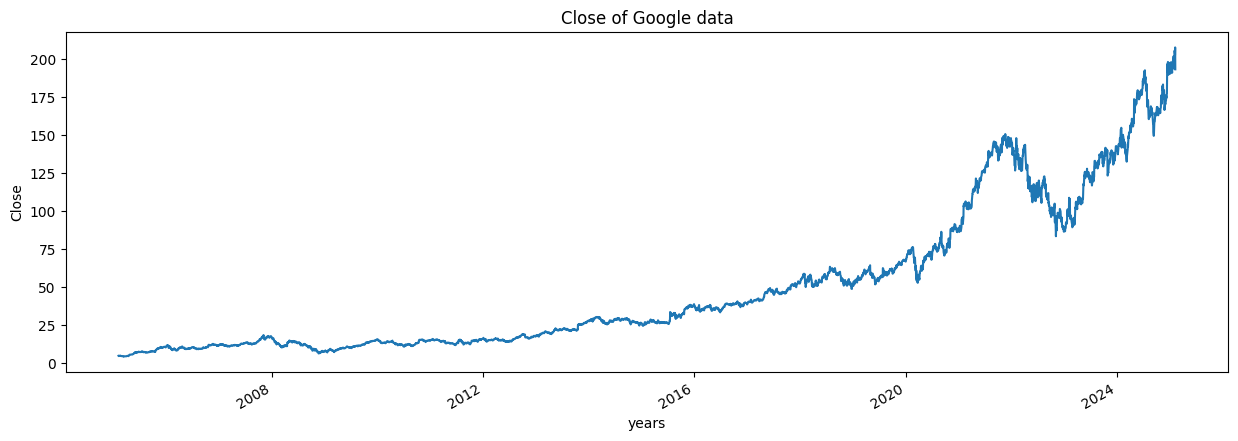

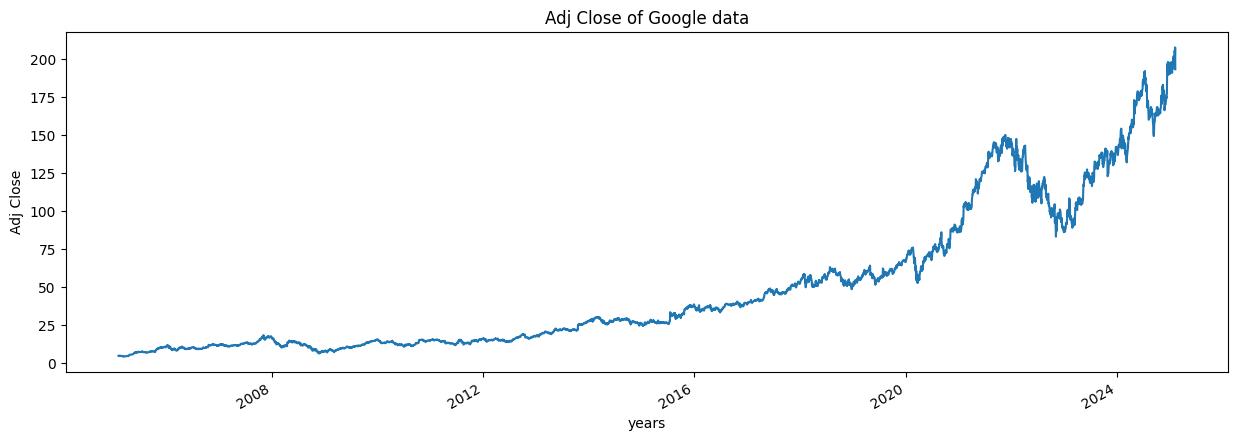

In [ ]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)

In [ ]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [ ]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

0
0  10
1  20
2  30
3  40
4  50

In [ ]:
data['MA'] = data.rolling(5).mean()
data

0    MA
0   10   NaN
1   20   NaN
2   30   NaN
3   40   NaN
4   50  30.0
5   60  40.0
6   70  50.0
7   80  60.0
8   90  70.0
9  100  80.0

In [ ]:
for i in range(2004,2025):
    print(i,list(google_data.index.year).count(i))

2004 0
2005 228
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 252


In [ ]:
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(250).mean()

In [ ]:
google_data['MA_for_250_days'][0:250].tail()


Date
2006-01-27         NaN
2006-01-30         NaN
2006-01-31         NaN
2006-02-01         NaN
2006-02-02    7.448949
Name: MA_for_250_days, dtype: float64

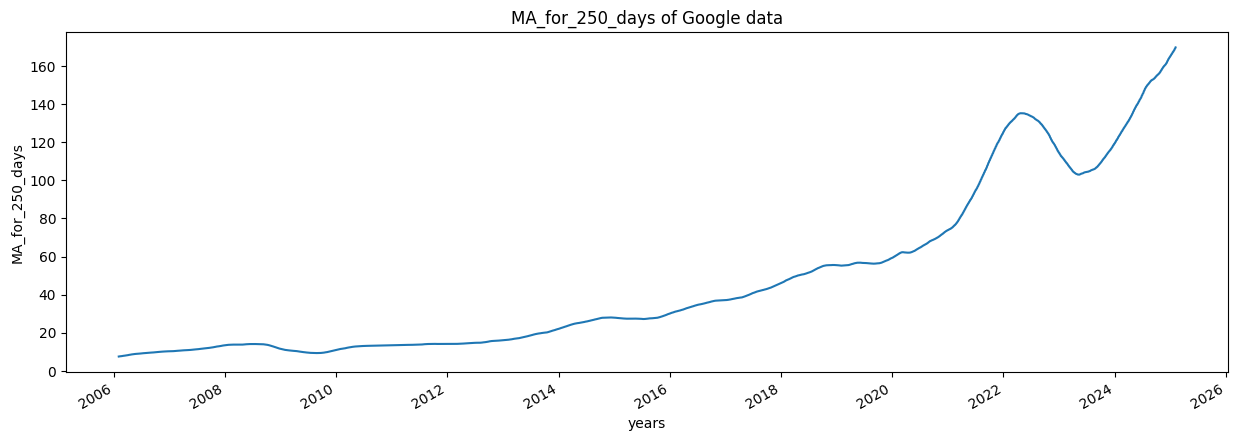

In [ ]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

In [ ]:
plot_graph((15,5), google_data[['Adj Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

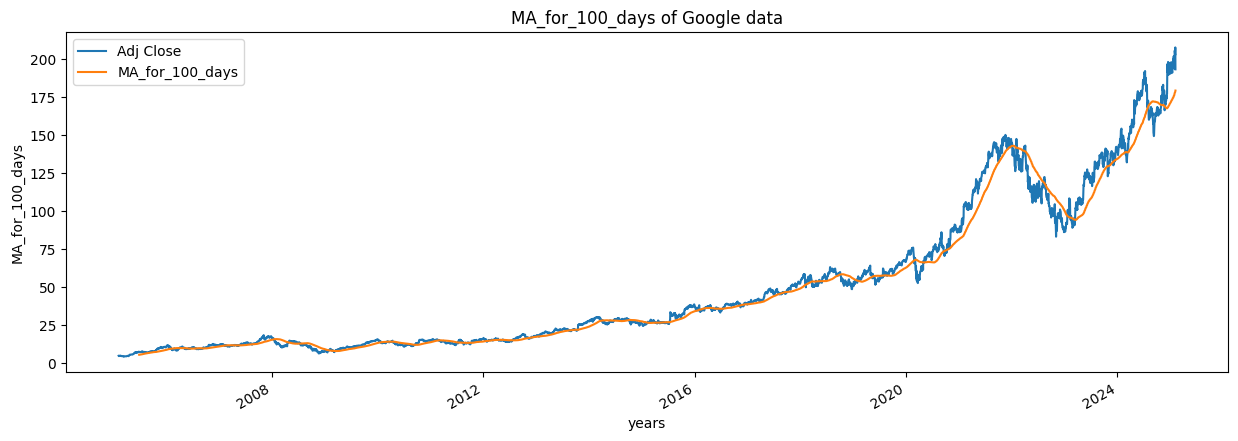

In [ ]:
google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days']], 'MA_for_100_days')

In [ ]:
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

<Figure size 640x480 with 0 Axes>

In [ ]:
google_data['percentage_change_cp'] = google_data['Adj Close'].pct_change()
google_data[['Adj Close','percentage_change_cp']].head()

Adj Close  percentage_change_cp
Date                                       
2005-02-07   4.864969                   NaN
2005-02-08   4.929743              0.013314
2005-02-09   4.754532             -0.035542
2005-02-10   4.665188             -0.018791
2005-02-11   4.650794             -0.003085

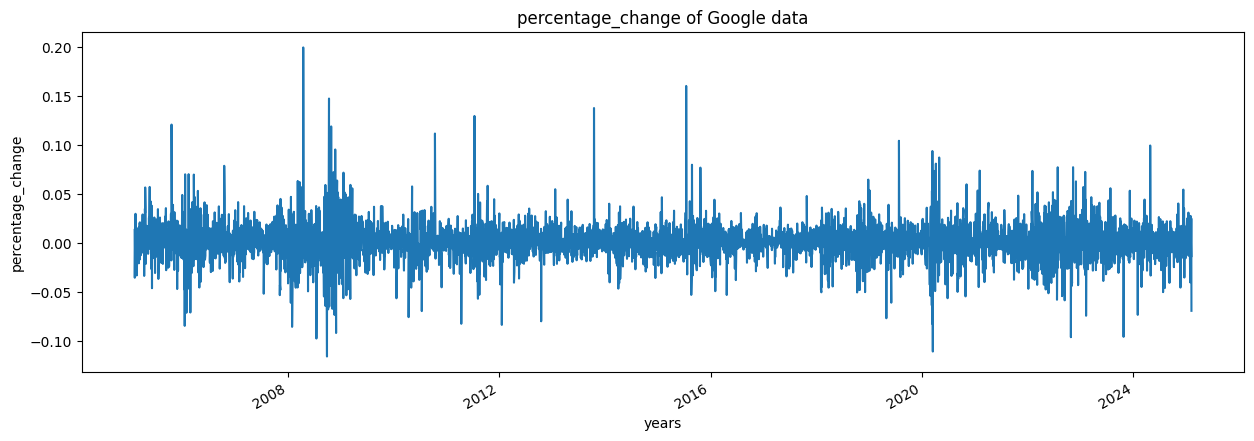

In [ ]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change')

In [ ]:
Adj_close_price = google_data[['Adj Close']]


In [ ]:
max(Adj_close_price.values),min(Adj_close_price.values)


(array([207.71000671]), array([4.34280968]))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.00256757],
       [0.00288608],
       [0.00202453],
       ...,
       [0.97506969],
       [1.        ],
       [0.92914293]])

In [ ]:
len(scaled_data)


5032

In [ ]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [ ]:
x_data[0],y_data[0]

(array([[2.56757031e-03],
        [2.88607575e-03],
        [2.02452603e-03],
        [1.58520469e-03],
        [1.51442492e-03],
        [2.19659025e-03],
        [2.46994126e-03],
        [2.85800957e-03],
        [2.79577392e-03],
        [2.80187252e-03],
        [1.99889600e-03],
        [2.31374369e-03],
        [1.69625486e-03],
        [1.32771565e-03],
        [1.58642394e-03],
        [1.35090249e-03],
        [1.24351241e-03],
        [1.46683434e-03],
        [1.33137574e-03],
        [1.68648914e-03],
        [1.24595325e-03],
        [7.76127240e-04],
        [6.08942363e-04],
        [3.42911534e-04],
        [0.00000000e+00],
        [4.41759830e-04],
        [7.44398621e-05],
        [5.24739127e-04],
        [6.16262549e-04],
        [7.18775627e-04],
        [4.40540581e-04],
        [4.86909572e-04],
        [5.19859785e-04],
        [7.84669020e-04],
        [5.58908590e-04],
        [6.66298666e-04],
        [6.73616507e-04],
        [6.16262549e-04],
        [1.2

In [ ]:

int(len(x_data)*0.7)

3452

In [ ]:
4908-100-int(len(x_data)*0.7)

1356

In [ ]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3452, 100, 1)
(3452, 1)
(1480, 100, 1)
(1480, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Input


In [ ]:
model = Sequential()

# Use an Input layer
model.add(Input(shape=(x_train.shape[1], 1)))

# Add the rest of the layers
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
3452/3452 ━━━━━━━━━━━━━━━━━━━━ 82s 23ms/step - loss: 1.4812e-04
Epoch 2/2
3452/3452 ━━━━━━━━━━━━━━━━━━━━ 79s 23ms/step - loss: 4.2294e-05


In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [ ]:
predictions = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step


In [ ]:
predictions

array([[0.24225308],
       [0.24656731],
       [0.24993938],
       ...,
       [0.8259326 ],
       [0.8244961 ],
       [0.8331707 ]], dtype=float32)

In [ ]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 53.60914 ],
       [ 54.48651 ],
       [ 55.172283],
       ...,
       [172.31041 ],
       [172.01826 ],
       [173.7824  ]], dtype=float32)

In [ ]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 60.97939301],
       [ 61.35654068],
       [ 60.0592041 ],
       ...,
       [202.63999939],
       [207.71000671],
       [193.30000305]])

In [ ]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [ ]:
rmse

15.014822990740893

In [ ]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

original_test_data  predictions
Date                                       
2019-03-20           60.979393    53.609138
2019-03-21           61.356541    54.486511
2019-03-22           60.059204    55.172283
2019-03-25           59.436440    54.780777
2019-03-26           59.018940    54.085346

<Figure size 640x480 with 0 Axes>

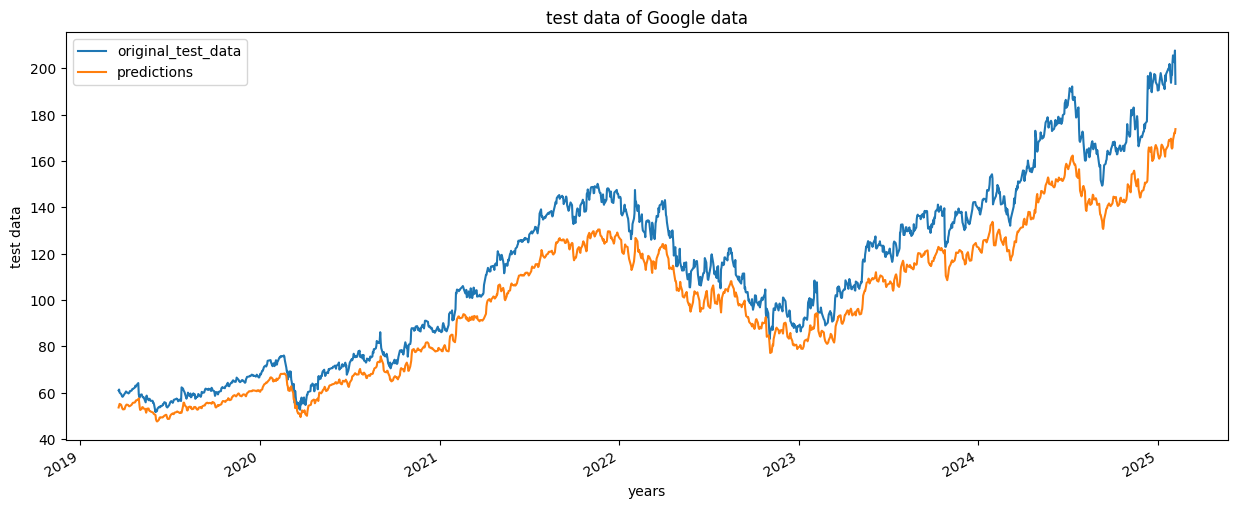

In [ ]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

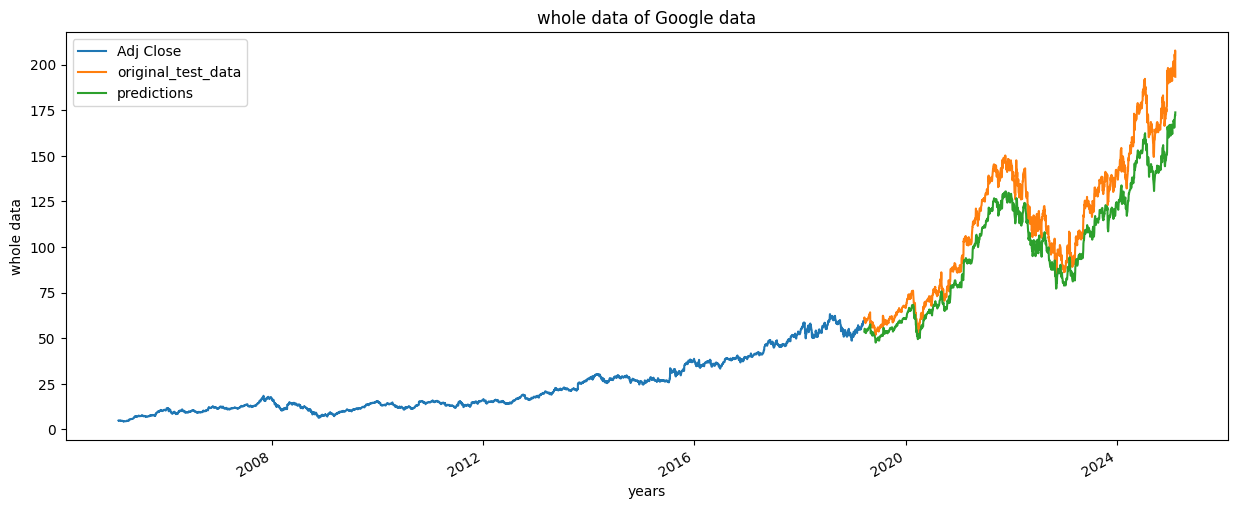

In [ ]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [ ]:
model.save("k22_price_model.keras")

In [3]:
stock = "GOOG"
google_data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
google_data.shape

(5032, 6)

In [5]:
google_data.describe()

Open         High          Low        Close    Adj Close  \
count  5032.000000  5032.000000  5032.000000  5032.000000  5032.000000   
mean     49.586913    50.112145    49.093188    49.610433    49.445911   
std      47.532861    48.065708    47.068842    47.569851    47.435752   
min       4.366135     4.443345     4.298140     4.358414     4.342810   
25%      13.450148    13.573809    13.312788    13.434830    13.386730   
50%      28.478506    28.697694    28.177509    28.425083    28.323314   
75%      66.445127    67.092749    65.831123    66.490751    66.252703   
max     204.500000   208.699997   204.259995   207.710007   207.710007   

             Volume  
count  5.032000e+03  
mean   1.068756e+08  
std    1.393336e+08  
min    1.584340e+05  
25%    2.637800e+07  
50%    4.960960e+07  
75%    1.306178e+08  
max    1.650833e+09

In [6]:
google_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of Google data')

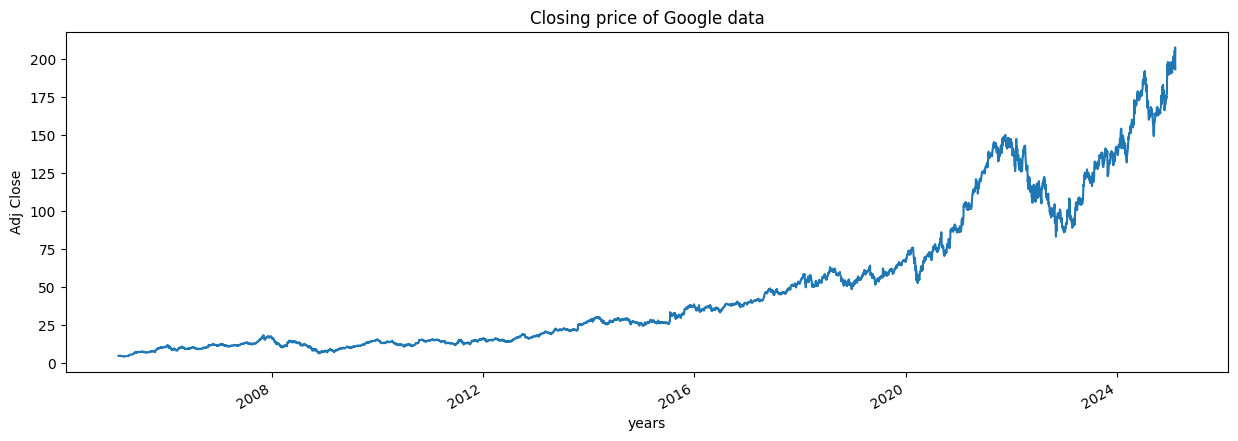

In [8]:
plt.figure(figsize = (15,5))
google_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing price of Google data")

In [9]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")


In [10]:
google_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

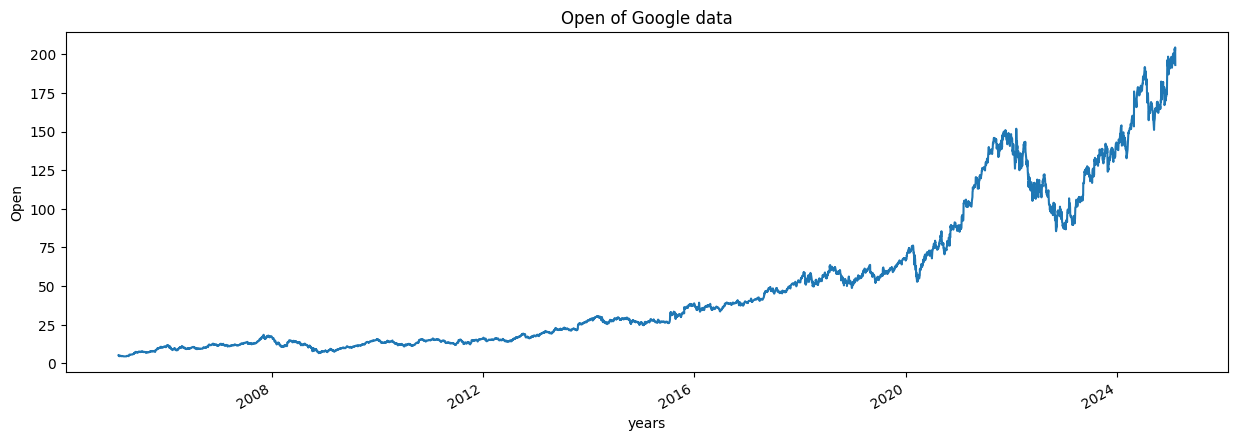

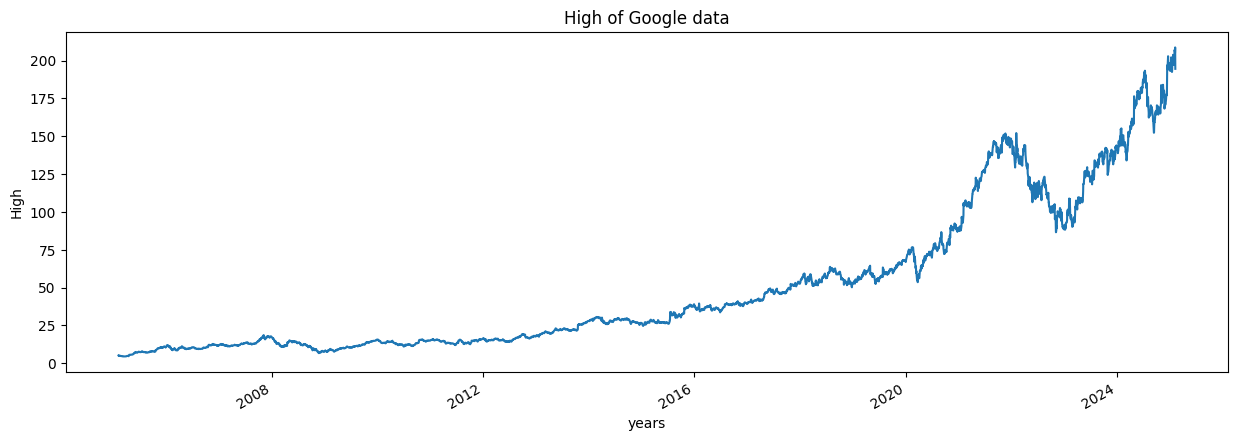

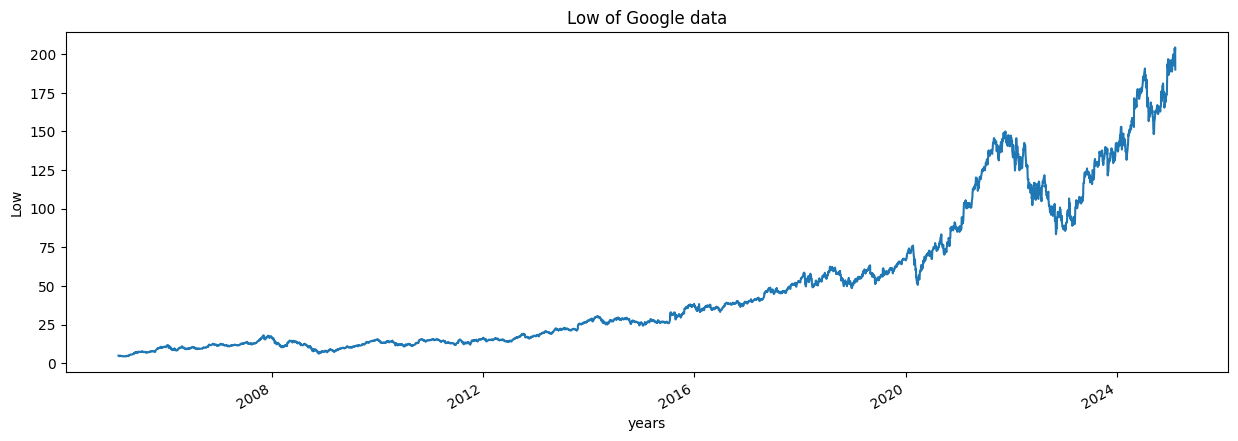

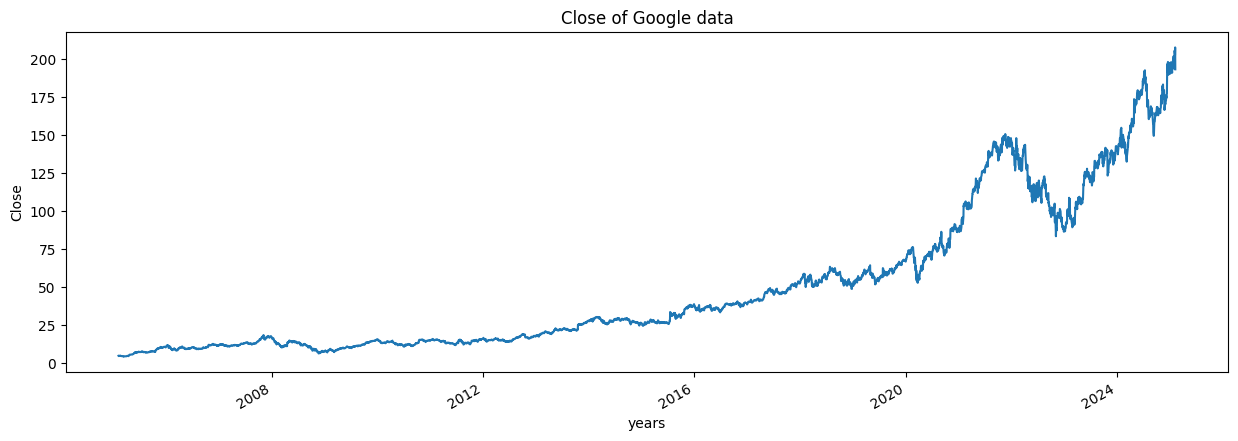

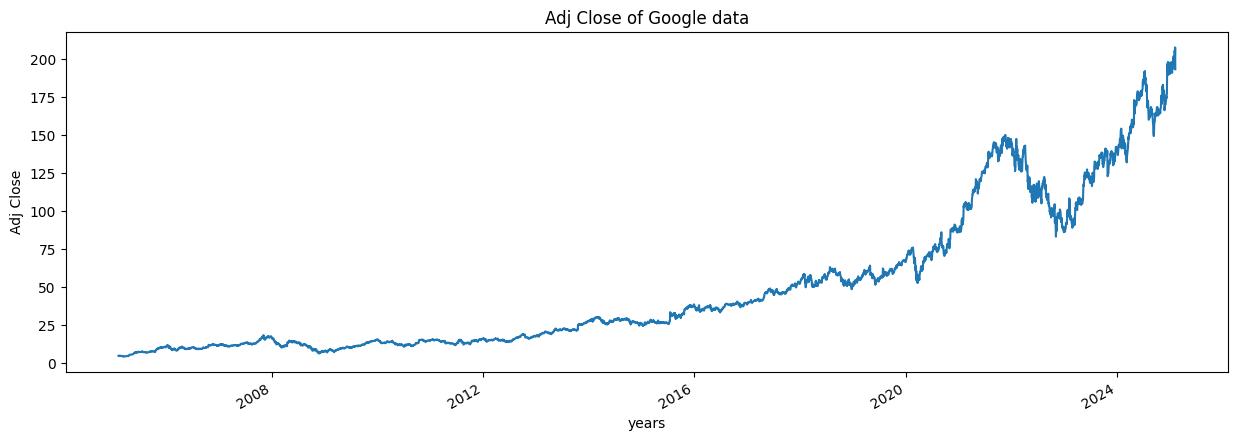

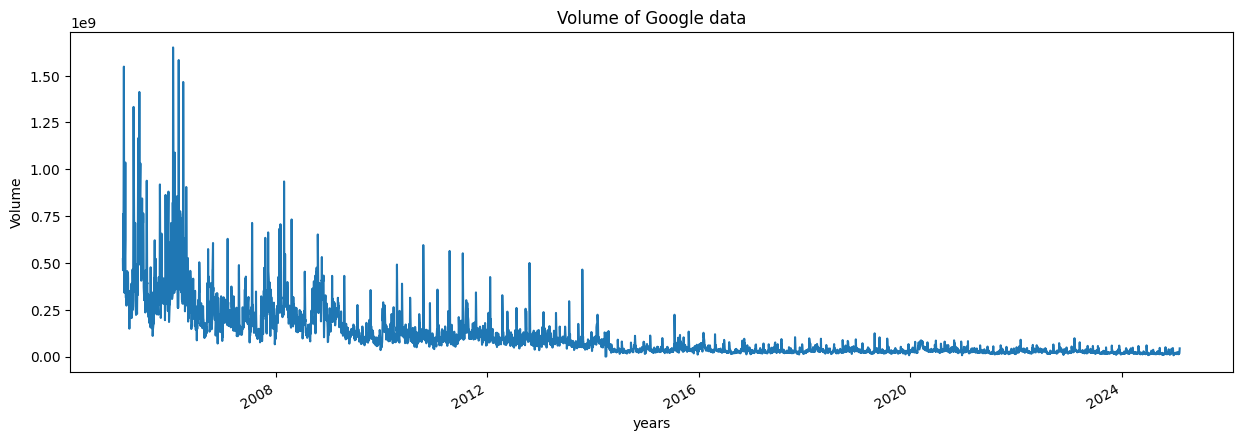

In [11]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)

In [12]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [13]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

0
0  10
1  20
2  30
3  40
4  50

In [14]:
data['MA'] = data.rolling(5).mean()
data

0    MA
0   10   NaN
1   20   NaN
2   30   NaN
3   40   NaN
4   50  30.0
5   60  40.0
6   70  50.0
7   80  60.0
8   90  70.0
9  100  80.0

In [15]:
for i in range(2004,2025):
    print(i,list(google_data.index.year).count(i))

2004 0
2005 228
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 252


In [16]:
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(250).mean()

In [17]:
google_data['MA_for_250_days'][0:250].tail()


Date
2006-01-27         NaN
2006-01-30         NaN
2006-01-31         NaN
2006-02-01         NaN
2006-02-02    7.448949
Name: MA_for_250_days, dtype: float64

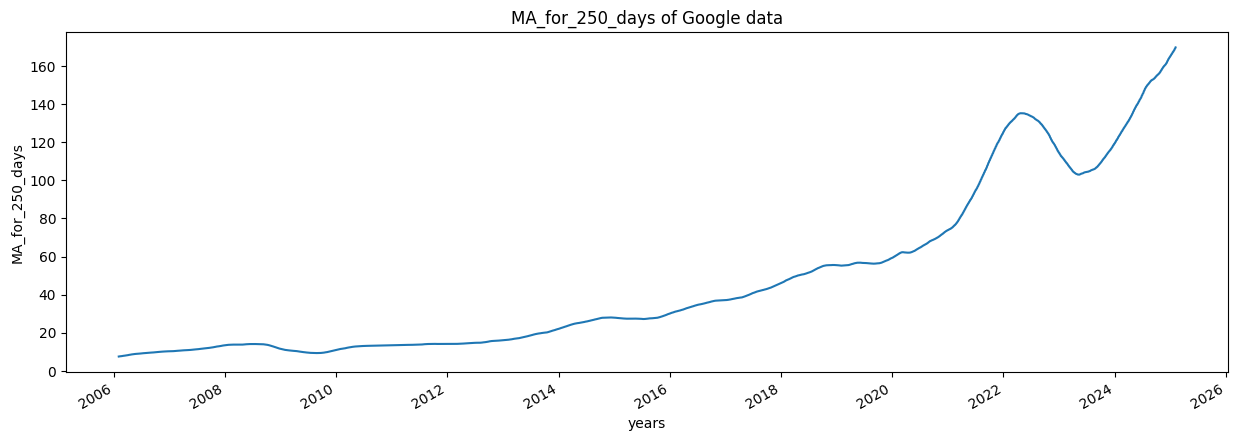

In [18]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

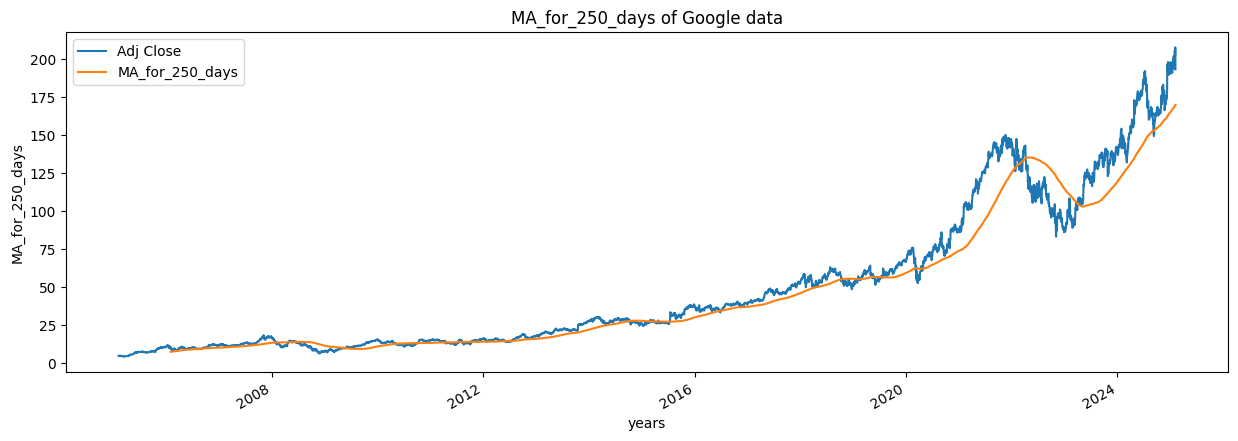

In [20]:
plot_graph((15,5), google_data[['Adj Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

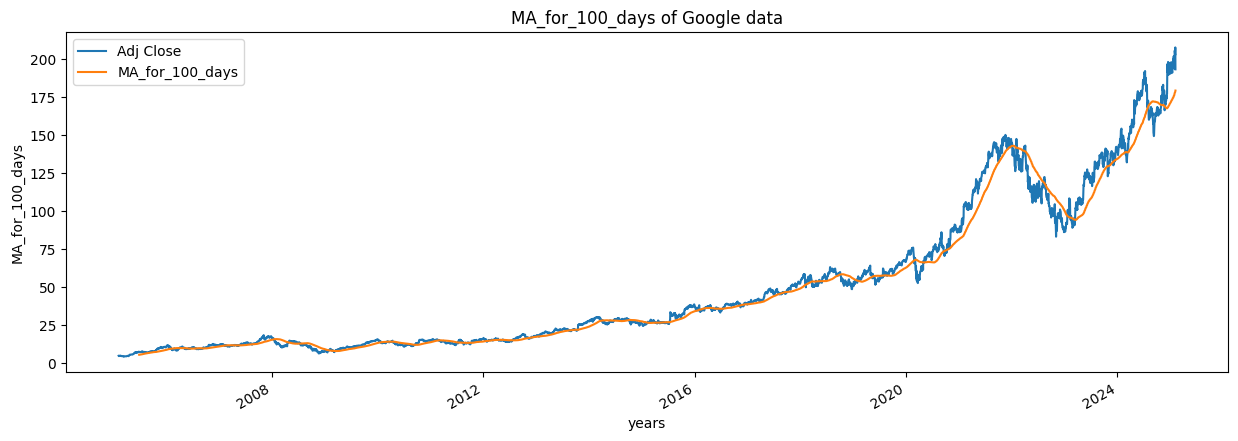

In [21]:
google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days']], 'MA_for_100_days')

In [22]:
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

<Figure size 640x480 with 0 Axes>

In [23]:
google_data['percentage_change_cp'] = google_data['Adj Close'].pct_change()
google_data[['Adj Close','percentage_change_cp']].head()

Adj Close  percentage_change_cp
Date                                       
2005-02-07   4.864969                   NaN
2005-02-08   4.929743              0.013314
2005-02-09   4.754532             -0.035542
2005-02-10   4.665188             -0.018791
2005-02-11   4.650794             -0.003085

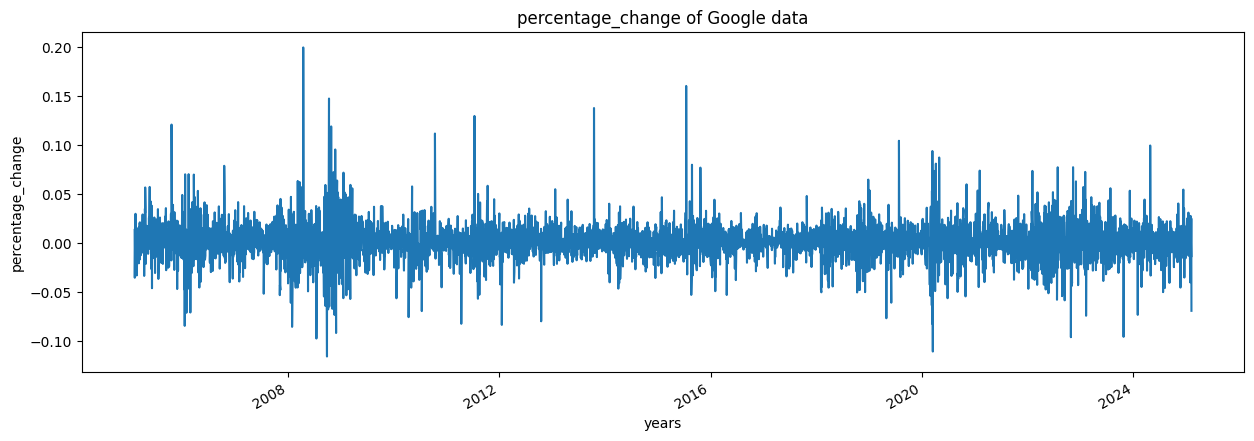

In [24]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change')

In [25]:
Adj_close_price = google_data[['Adj Close']]


In [26]:
max(Adj_close_price.values),min(Adj_close_price.values)


(array([207.71000671]), array([4.34280968]))

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.00256757],
       [0.00288608],
       [0.00202453],
       ...,
       [0.97506969],
       [1.        ],
       [0.92914293]])

In [28]:
len(scaled_data)


5032

In [29]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [30]:
x_data[0],y_data[0]

(array([[2.56757031e-03],
        [2.88607575e-03],
        [2.02452603e-03],
        [1.58520469e-03],
        [1.51442492e-03],
        [2.19659025e-03],
        [2.46994126e-03],
        [2.85800957e-03],
        [2.79577392e-03],
        [2.80187252e-03],
        [1.99889600e-03],
        [2.31374369e-03],
        [1.69625486e-03],
        [1.32771565e-03],
        [1.58642394e-03],
        [1.35090249e-03],
        [1.24351241e-03],
        [1.46683434e-03],
        [1.33137574e-03],
        [1.68648914e-03],
        [1.24595325e-03],
        [7.76127240e-04],
        [6.08942363e-04],
        [3.42911534e-04],
        [0.00000000e+00],
        [4.41759830e-04],
        [7.44398621e-05],
        [5.24739127e-04],
        [6.16262549e-04],
        [7.18775627e-04],
        [4.40540581e-04],
        [4.86909572e-04],
        [5.19859785e-04],
        [7.84669020e-04],
        [5.58908590e-04],
        [6.66298666e-04],
        [6.73616507e-04],
        [6.16262549e-04],
        [1.2

In [31]:

int(len(x_data)*0.7)

3452

In [32]:
4908-100-int(len(x_data)*0.7)

1356

In [33]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [34]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3452, 100, 1)
(3452, 1)
(1480, 100, 1)
(1480, 1)


In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Input


In [41]:
model = Sequential()

# Use an Input layer
model.add(Input(shape=(x_train.shape[1], 1)))

# Add the rest of the layers
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [42]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [43]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
3452/3452 ━━━━━━━━━━━━━━━━━━━━ 82s 23ms/step - loss: 1.4812e-04
Epoch 2/2
3452/3452 ━━━━━━━━━━━━━━━━━━━━ 79s 23ms/step - loss: 4.2294e-05


In [44]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [45]:
predictions = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step


In [46]:
predictions

array([[0.24225308],
       [0.24656731],
       [0.24993938],
       ...,
       [0.8259326 ],
       [0.8244961 ],
       [0.8331707 ]], dtype=float32)

In [47]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 53.60914 ],
       [ 54.48651 ],
       [ 55.172283],
       ...,
       [172.31041 ],
       [172.01826 ],
       [173.7824  ]], dtype=float32)

In [48]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 60.97939301],
       [ 61.35654068],
       [ 60.0592041 ],
       ...,
       [202.63999939],
       [207.71000671],
       [193.30000305]])

In [49]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [50]:
rmse

15.014822990740893

In [51]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

original_test_data  predictions
Date                                       
2019-03-20           60.979393    53.609138
2019-03-21           61.356541    54.486511
2019-03-22           60.059204    55.172283
2019-03-25           59.436440    54.780777
2019-03-26           59.018940    54.085346

<Figure size 640x480 with 0 Axes>

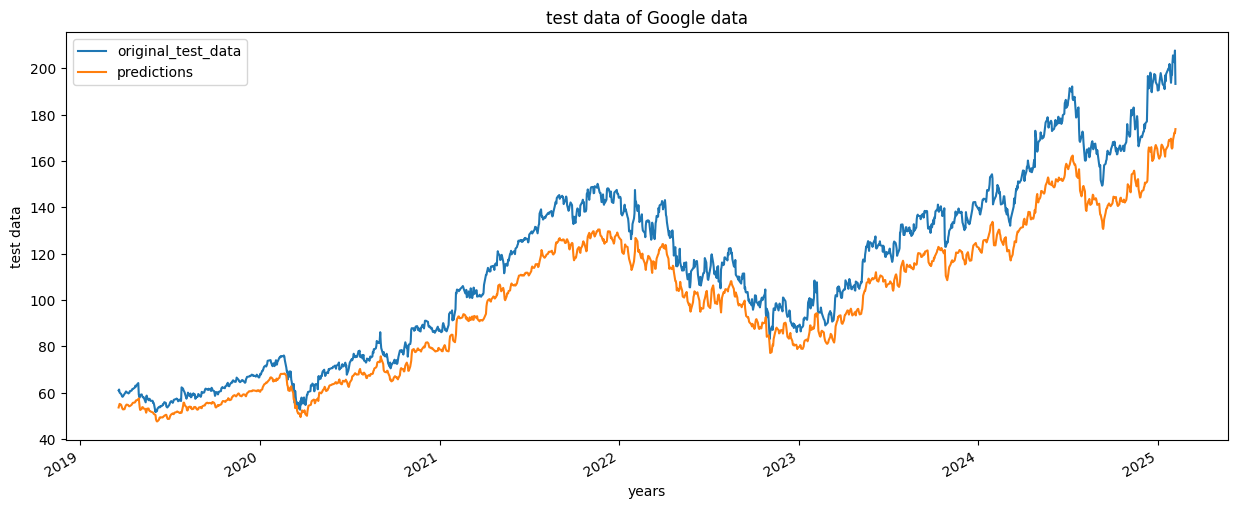

In [52]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

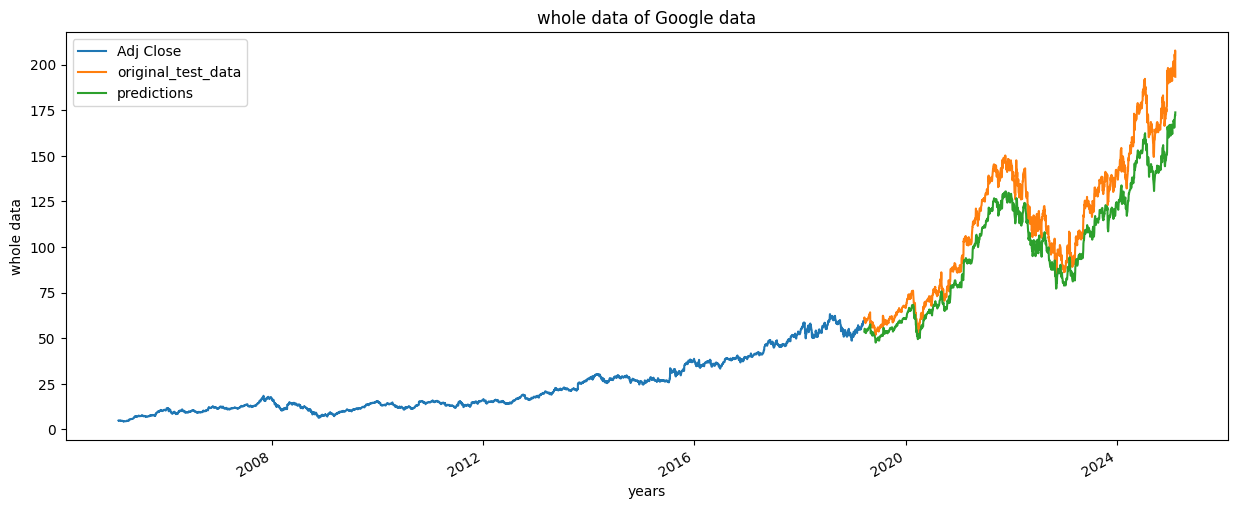

In [53]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [54]:
model.save("k22_price_model.keras")